### Probability disributions

In [1]:
RANDOM_STATE = 31415

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

In [54]:
import scipy

In [3]:
dataset = seaborn.load_dataset('titanic')

In [4]:
ages = dataset.age.dropna() # removing null values

In [5]:
dataset.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
### Uniform distribution

In [9]:
from scipy.stats import uniform

In [10]:
uniform_dist = uniform(loc=0, scale = 20)

In [11]:
uniform_dist.rvs(size=10, random_state=RANDOM_STATE)

array([12.91637212, 13.5034834 , 19.41407972, 17.69608729, 18.18131685,
       16.47185933,  9.73419442, 12.41987159, 12.87024926,  8.00739132])

In [12]:
x = np.linspace(-5,25,100)

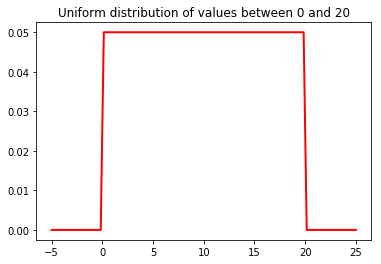

In [13]:
_, ax = plt.subplots(1, 1)
ax.plot(x, uniform_dist.pdf(x), 'r-', lw = 2)
plt.title('Uniform distribution of values between 0 and 20')
plt.show()

### Bernaulli distribition

In [14]:
from scipy.stats import bernoulli

In [15]:
countSurvived = dataset[dataset['survived']==1].count()

In [16]:
countSurvived

survived       342
pclass         342
sex            342
age            290
sibsp          342
parch          342
fare           342
embarked       340
class          342
who            342
adult_male     342
deck           136
embark_town    340
alive          342
alone          342
dtype: int64

In [17]:
countAll = dataset.survived.count()

In [18]:
countAll

891

In [19]:
survived_dist = bernoulli(countSurvived/countAll)

In [21]:
#survived_dist
bernoulli(countSurvived/countAll)

In [22]:
survived_dist.pmf(0)

array([0.61616162, 0.61616162, 0.61616162, 0.67452301, 0.61616162,
       0.61616162, 0.61616162, 0.61840629, 0.61616162, 0.61616162,
       0.61616162, 0.84736251, 0.61840629, 0.61616162, 0.61616162])

In [23]:
survived_dist.pmf(1)

array([0.38383838, 0.38383838, 0.38383838, 0.32547699, 0.38383838,
       0.38383838, 0.38383838, 0.38159371, 0.38383838, 0.38383838,
       0.38383838, 0.15263749, 0.38159371, 0.38383838, 0.38383838])

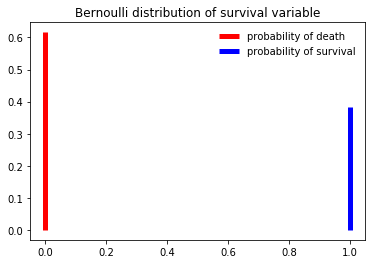

In [24]:
_, ax = plt.subplots(1, 1)
ax.vlines(0, 0, survived_dist.pmf(0), colors='r', linestyles='-', lw=5, label="probability of death")
ax.vlines(1, 0, survived_dist.pmf(1), colors='b', linestyles='-', lw=5, label="probability of survival")
ax.legend(loc='best', frameon=False)
plt.title("Bernoulli distribution of survival variable")
plt.show()

In [25]:
dataset.groupby(by="pclass", as_index=False).size()

pclass
1    216
2    184
3    491
dtype: int64

In [26]:
dataset.groupby(["pclass"], as_index=False).size()

pclass
1    216
2    184
3    491
dtype: int64

In [27]:
dataset.groupby(["pclass"], as_index=False).count()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,216,216,186,216,216,216,214,216,216,216,175,214,216,216
1,2,184,184,173,184,184,184,184,184,184,184,16,184,184,184
2,3,491,491,355,491,491,491,491,491,491,491,12,491,491,491


In [28]:
dataset.pclass.count()

891

In [29]:
dataset.groupby(by = "pclass", as_index=False).size() / dataset.pclass.count()

pclass
1    0.242424
2    0.206510
3    0.551066
dtype: float64

In [30]:
dataset.groupby(by = "pclass", as_index=False).size() / dataset.pclass.count().reset_index()

AttributeError: 'numpy.int32' object has no attribute 'reset_index'

### discrete variables

In [31]:
from scipy.stats import rv_discrete

In [32]:
pclass_probability = pd.DataFrame({'probability' : dataset.groupby(["pclass"]).size() / dataset.pclass.count()}).reset_index()

In [33]:
pclass_probability

,pclass,probability
0,1,0.242424
1,2,0.206510
2,3,0.551066


In [34]:
pclass_probability.pclass

0    1
1    2
2    3
Name: pclass, dtype: int64

In [35]:
values = pclass_probability.pclass

In [36]:
probabilities = pclass_probability.probability

In [37]:
probabilities

0    0.242424
1    0.206510
2    0.551066
Name: probability, dtype: float64

In [38]:
custom_discrete_dist = rv_discrete(values = (values,probabilities))

In [39]:
x = [0, 0.9, 1, 2, 2,5, 3, 4]

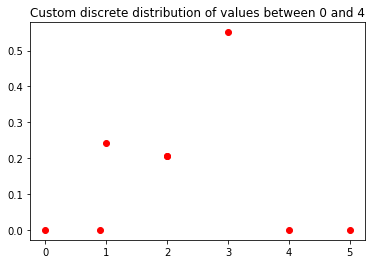

In [40]:
_, ax = plt.subplots(1, 1)
ax.plot(x, custom_discrete_dist.pmf(x), 'ro', lw=2)
plt.title('Custom discrete distribution of values between 0 and 4')
plt.show()

### normal distribution

In [41]:
from scipy.stats import norm

In [42]:
mean = 3
standard_deviation = 2

In [43]:
normal_distribution = norm(loc=mean, scale = standard_deviation)

In [44]:
x = np.linspace(-6,12,200)

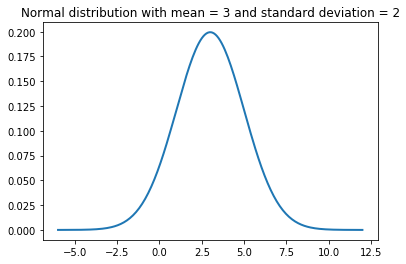

In [45]:
_, ax = plt.subplots(1, 1)
ax.plot(x, normal_distribution.pdf(x), '-', lw=2)
plt.title('Normal distribution with mean = 3 and standard deviation = 2')
plt.show()

### gamma distribution

{ "_id" : ObjectId("5bde8716f85640dc52ed7676"), "address" : { "building" : "152", "coord" : [ -73.9771312, 40.67257840000001 ], "street" : "7 Avenue", "zipcode" : "11215" }, "borough" : "Brooklyn", "cuisine" : "Chinese", "grades" : [ { "date" : ISODate("2014-10-01T00:00:00Z"), "grade" : "A", "score" : 9 }, { "date" : ISODate("2014-03-11T00:00:00Z"), "grade" : "A", "score" : 12 }, { "date" : ISODate("2013-02-06T00:00:00Z"), "grade" : "A", "score" : 12 }, { "date" : ISODate("2012-01-26T00:00:00Z"), "grade" : "A", "score" : 13 } ], "name" : "Szechuan Delight Restaurant", "restaurant_id" : "40391528" }
Type "it" for more


In [46]:
from scipy.stats import gamma

In [47]:
gamma_distribution = gamma(loc=3, scale =2, a =1)

In [48]:
x = np.linspace(0,12,200)

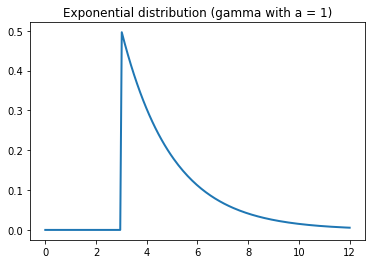

In [49]:
_, ax = plt.subplots(1, 1)
ax.plot(x, gamma_distribution.pdf(x), '-', lw=2)
plt.title('Exponential distribution (gamma with a = 1)')
plt.show()

In [ ]:
### probability of discrete functions: probability mass functions
### probabaility density functions : probability density function

### fititng distributions to data

In [56]:
def fit_and_plot(dist):
    params = dist.fit(ages)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    
    x = np.linspace(0,80,80)
    
    _,ax = plt.subplots(1,1)
    plt.hist(ages, bins=80, range=(0,80))
    
    ax2 = ax.twinx()
    ax2.plot(x, dist.pdf(x, loc=loc, scale=scale, *arg), '-', color = "r", lw=2)
    plt.show()
    
    return dist, loc, scale, arg

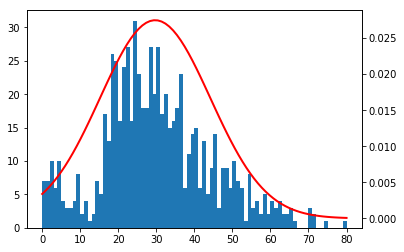

(<scipy.stats._continuous_distns.norm_gen at 0x25bd887b668>,
 29.69911764705882,
 14.516321150817316,
 ())

In [57]:
# fitting normal distribution

fit_and_plot(scipy.stats.norm)

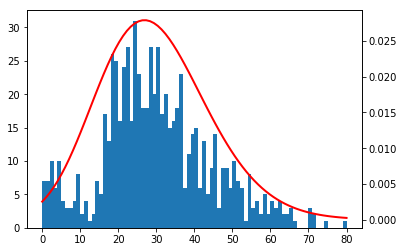

(<scipy.stats._continuous_distns.gamma_gen at 0x25bd8a02828>,
 -45.37307548137508,
 2.806622890786299,
 (26.748229688039117,))

In [58]:
# fitting gamma distribution to variable age

fit_and_plot(scipy.stats.gamma)

### Choosing best distribution using Kolmogorov-Smirnov test

In [60]:
""" The Kolmogorov-Smirnov statisitc quantifies a distance between the empirical distribution function of the sample nad the cumulative distribution
function of the reference distribution"""

' The Kolmogorov-Smirnov statisitc quantifies a distance between the empirical distribution function of the sample nad the cumulative distribution\nfunction of the reference distribution'

We can use this test to verify whether probability distribution fits the data. In order to do it we must specify the significance level. Usually, 0.05 is used. As in every statistical test if the p-value (calculated by the test) is smaller than the significance level, we reject the null hypothesis.

*Hypothesis* : The data matches the given distribution (there is no difference between both distributions)

*Alternative Hypothesis* : At leat one value doesnot match the specified distribution. (two-sided test is used; so values are either smaller or greater)

In [61]:
# fitting distributions and performing Kolmogorov-Smirnov test to check whether it matches the distribution

In [62]:
from scipy.stats import kstest

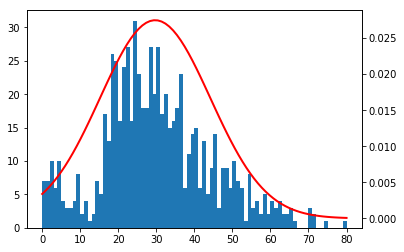

In [67]:
dist, loc, scale, arg = fit_and_plot(scipy.stats.norm)
d,pvalue = kstest(ages.tolist(), lambda x: dist.cdf(x, loc=loc, scale=scale, *arg), alternative = "two-sided")

In [66]:
# d,pvalue = kstest(ages.tolist(), lambda x: dist.cdf(x, loc=loc, scale=scale, *arg), alternative = "two-sided")

In [68]:
pvalue

0.00496347192487967

From the chart we see that the data looks to be normally-distributed, but there is a huge difference between empirical cumulative distributions. </br> Kolmogorov-Smirnov test calculates the maximal vertical difference between empirical cuimulative distributions.

#### plotting Cumulative distributions

In [73]:
def fit_and_plot_cdf(dist):
    params = dist.fit(ages)
    
    arg = params[:-2]
    print(arg)
    loc = params[-2]
    print(loc)
    scale = params[-1]
    print(scale)
    
    x = np.linspace(0,80,80)
    
    _,ax = plt.subplots(1,1)
    
    counts, bin_edges = np.histogram(ages, bins = 80, normed=True)
    cdf = np.cumsum(counts)
    plt.plot(bin_edges[1:], cdf)
    
    ax2 = ax.twinx()
    ax2.plot(x, dist.cdf(x, loc=loc, scale=scale, *arg), '-', color = 'r', lw =2)
    plt.show()
    
    return dist, loc, scale, arg

()
29.69911764705882
14.516321150817316


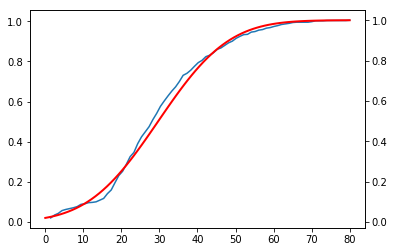

(<scipy.stats._continuous_distns.norm_gen at 0x25bd887b668>,
 29.69911764705882,
 14.516321150817316,
 ())

In [74]:
fit_and_plot_cdf(scipy.stats.norm)

As observed in the figure above, and evident from p-value, which is 0.04, the null hypothesis is rejected.

In [75]:
# Now, we have to keep repeating the steps with different distributions until it fits the data

## Monte Carlo Simulations

Monte Carlo simulation generates a large number of scenarios based on the probability of inputs.

Inputs:
    
maintenance savings: 10−20 USD per unit 
</br>

labor savings: -2–8 USD per unit

raw material savings: 3−9 USD per unit

production level: 15,000–35000 units per year

annual lease: $400000

the annual savings = (maintenance savings + labor savings + raw material savings) * production level

In [76]:
_90_conf_interval = 3.29

maintenance = norm(loc = (20 + 10) / 2, scale = (20 - 10) / _90_conf_interval)
labor = norm(loc = (8 + -2) / 2, scale = (8 - -2) / _90_conf_interval)
raw_material = norm(loc = (9 + 3) / 2, scale = (9 - 3) / _90_conf_interval)
prod_level = norm(loc = (35000 + 15000) / 2, scale = (35000 - 15000) / _90_conf_interval)

number_of_simulations = 1000000

maintenance_results = maintenance.rvs(number_of_simulations)
labor_results = labor.rvs(number_of_simulations)
raw_materials_results = raw_material.rvs(number_of_simulations)
prod_level_results = prod_level.rvs(number_of_simulations)

data = pd.DataFrame({
    "maintenance_savings_per_unit": maintenance_results,
    "labor_savings_per_unit": labor_results,
    "raw_materials_savings_per_unit": raw_materials_results,
    "production_level": prod_level_results
})

data["total_savings"] = (data.maintenance_savings_per_unit + data.labor_savings_per_unit + data.raw_materials_savings_per_unit) * data.production_level
data["total_savings"] = (data.maintenance_savings_per_unit + data.labor_savings_per_unit + data.raw_materials_savings_per_unit) * data.production_level

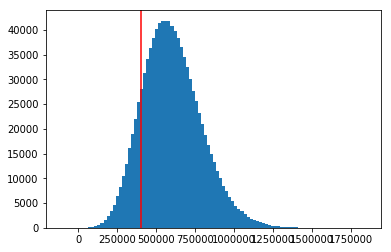

In [77]:
plt.hist(data.total_savings, bins = 100)
plt.axvline(x = 400000, c = "r")
plt.show()

In [79]:
data[data["total_savings"] < 400000].count()

maintenance_savings_per_unit      140879
labor_savings_per_unit            140879
raw_materials_savings_per_unit    140879
production_level                  140879
total_savings                     140879
dtype: int64

In [80]:
140879/400000

0.3521975